In [152]:
#from google.colab import drive
#drive.mount('/content/drive')

In [153]:
import pandas as pd
import numpy as np

In [154]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [155]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [156]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [157]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [158]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=5:
        a.append(i)

In [159]:
df = df.drop(a)

In [160]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
3720,1958,1,27,23.1,10.2,43,0.5,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3721,1958,2,5,25.2,10.4,39,0.2,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3722,1958,3,9,32.1,16.4,28,-0.3,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3723,1958,4,1,39.3,23.2,11,-0.5,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3724,1958,5,2,41.0,26.2,8,-0.9,uttar pradesh,ballia,5,5,11,11,1,21,7,32


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89280 entries, 3720 to 439703
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            89280 non-null  int64  
 1   Month           89280 non-null  int64  
 2   ppt(mm)         89280 non-null  int64  
 3   tmax(degC)      89280 non-null  float64
 4   tmin(degC)      89280 non-null  float64
 5   aet(mm)         89280 non-null  int64  
 6   PDSI(unitless)  89280 non-null  float64
 7   state           89280 non-null  object 
 8   district        89280 non-null  object 
 9   cluster14       89280 non-null  int64  
 10  cluster15       89280 non-null  int64  
 11  cluster18       89280 non-null  int64  
 12  cluster20       89280 non-null  int64  
 13  cluster25       89280 non-null  int64  
 14  cluster27       89280 non-null  int64  
 15  cluster30       89280 non-null  int64  
 16  cluster35       89280 non-null  int64  
dtypes: float64(3), int64(12), o

In [162]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(89280, 8)

In [163]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [164]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
3720,1958,1,27,23.1,10.2,43,0.5,ballia,1-1958
3721,1958,2,5,25.2,10.4,39,0.2,ballia,2-1958
3722,1958,3,9,32.1,16.4,28,-0.3,ballia,3-1958
3723,1958,4,1,39.3,23.2,11,-0.5,ballia,4-1958
3724,1958,5,2,41.0,26.2,8,-0.9,ballia,5-1958


In [165]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
3720,1958,1,27,23.1,10.2,43,0.5,ballia,1958-01-01,1
3721,1958,2,5,25.2,10.4,39,0.2,ballia,1958-02-01,1
3722,1958,3,9,32.1,16.4,28,-0.3,ballia,1958-03-01,1
3723,1958,4,1,39.3,23.2,11,-0.5,ballia,1958-04-01,1
3724,1958,5,2,41.0,26.2,8,-0.9,ballia,1958-05-01,1


In [167]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
3720,1958,1,27,43,0.5,ballia,1958-01-01,1,16.65
3721,1958,2,5,39,0.2,ballia,1958-02-01,1,17.80
3722,1958,3,9,28,-0.3,ballia,1958-03-01,1,24.25
3723,1958,4,1,11,-0.5,ballia,1958-04-01,1,31.25
3724,1958,5,2,8,-0.9,ballia,1958-05-01,1,33.60


In [168]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
439699,2019,8,255,131,1.0,hoshiarpur,2019-08-01,1,29.95
439700,2019,9,86,107,-0.5,hoshiarpur,2019-09-01,1,29.40
439701,2019,10,10,63,-0.9,hoshiarpur,2019-10-01,1,24.55
439702,2019,11,31,42,0.7,hoshiarpur,2019-11-01,1,19.15
439703,2019,12,33,35,0.9,hoshiarpur,2019-12-01,1,11.90


In [169]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,28,14.95,36,ballia
1,1981-02-01,6,18.80,31,ballia
2,1981-03-01,38,22.50,49,ballia
3,1981-04-01,2,29.65,9,ballia
4,1981-05-01,15,32.70,19,ballia


In [170]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
4452,2019,1,30,35,-0.9,ballia,2019-01-01,1,14.55
4453,2019,2,36,41,1.1,ballia,2019-02-01,1,16.80
4454,2019,3,7,23,0.8,ballia,2019-03-01,1,22.05
4455,2019,4,9,18,1.2,ballia,2019-04-01,1,29.45
4456,2019,5,3,9,0.6,ballia,2019-05-01,1,32.85
...,...,...,...,...,...,...,...,...,...
439699,2019,8,255,131,1.0,hoshiarpur,2019-08-01,1,29.95
439700,2019,9,86,107,-0.5,hoshiarpur,2019-09-01,1,29.40
439701,2019,10,10,63,-0.9,hoshiarpur,2019-10-01,1,24.55
439702,2019,11,31,42,0.7,hoshiarpur,2019-11-01,1,19.15


In [171]:
from fbprophet import Prophet

In [172]:

model = Prophet()

In [173]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
54715,2018-08-01,139,30.10,127,hoshiarpur
54716,2018-09-01,231,28.60,114,hoshiarpur
54717,2018-10-01,16,24.15,71,hoshiarpur
54718,2018-11-01,11,18.55,37,hoshiarpur
54719,2018-12-01,11,13.55,25,hoshiarpur


In [176]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [177]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [178]:

forecast = model.predict(fut)

In [179]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,26.439261,26.156038,30.707208,26.369476,26.491370,2.001566,2.001566,2.001566,2.001566,2.001566,2.001566,0.0,0.0,0.0,28.440827
465,2019-09-30,26.444171,24.844366,29.270211,26.351848,26.517841,0.511399,0.511399,0.511399,0.511399,0.511399,0.511399,0.0,0.0,0.0,26.955570
466,2019-10-31,26.449244,20.651578,25.125642,26.339697,26.546606,-3.515960,-3.515960,-3.515960,-3.515960,-3.515960,-3.515960,0.0,0.0,0.0,22.933284
467,2019-11-30,26.454154,15.461809,19.867563,26.321632,26.573800,-8.779766,-8.779766,-8.779766,-8.779766,-8.779766,-8.779766,0.0,0.0,0.0,17.674388
468,2019-12-31,26.459227,15.246051,19.584533,26.296245,26.605441,-9.076200,-9.076200,-9.076200,-9.076200,-9.076200,-9.076200,0.0,0.0,0.0,17.383027


In [180]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,28.440827,26.156038,30.707208
465,2019-09-30,26.955570,24.844366,29.270211
466,2019-10-31,22.933284,20.651578,25.125642
467,2019-11-30,17.674388,15.461809,19.867563
468,2019-12-31,17.383027,15.246051,19.584533


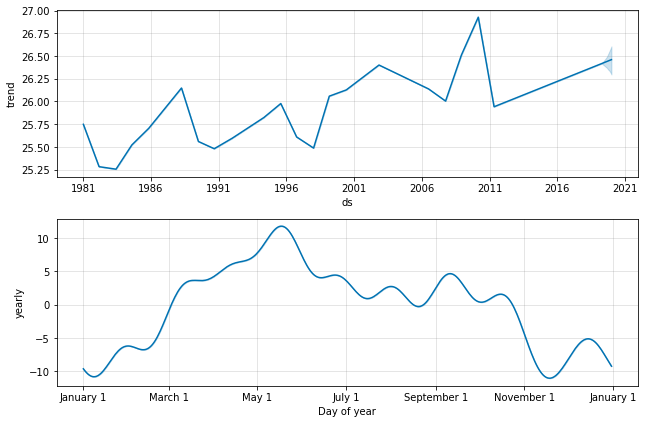

In [181]:
fig2 = model.plot_components(forecast)

In [182]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (1440, 1)
16.782475719420713


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,14.55,1,20.169895
1,20.85,1,20.169895
2,20.15,1,20.169895
3,14.15,1,20.169895
4,14.25,1,20.169895
...,...,...,...
1435,15.50,12,17.383027
1436,15.75,12,17.383027
1437,22.25,12,17.383027
1438,15.60,12,17.383027


In [183]:
import matplotlib.pyplot as plt

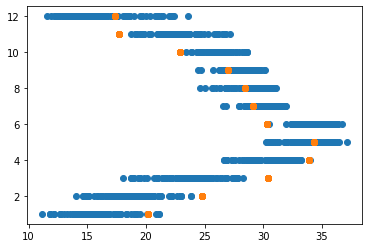

In [184]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [185]:
import pickle

In [186]:
filename = 'Cluster 15 - 5.sav'
pickle.dump(model, open(filename, 'wb'))

In [187]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [188]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,25.747798,13.979778,18.228220,25.747798,25.747798,-9.638454,-9.638454,-9.638454,-9.638454,-9.638454,-9.638454,0.0,0.0,0.0,16.109344
1,1981-02-01,25.713716,17.402664,21.756371,25.713716,25.713716,-6.209295,-6.209295,-6.209295,-6.209295,-6.209295,-6.209295,0.0,0.0,0.0,19.504422
2,1981-03-01,25.682932,22.621580,27.138963,25.682932,25.682932,-0.839723,-0.839723,-0.839723,-0.839723,-0.839723,-0.839723,0.0,0.0,0.0,24.843209
3,1981-04-01,25.648850,27.634888,32.093959,25.648850,25.648850,4.230120,4.230120,4.230120,4.230120,4.230120,4.230120,0.0,0.0,0.0,29.878970
4,1981-05-01,25.615867,31.140074,35.684416,25.615867,25.615867,7.785935,7.785935,7.785935,7.785935,7.785935,7.785935,0.0,0.0,0.0,33.401802
